<a href="https://colab.research.google.com/github/delowerhossentuhin/Computer-Vision-and-Pattern-Recognition-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

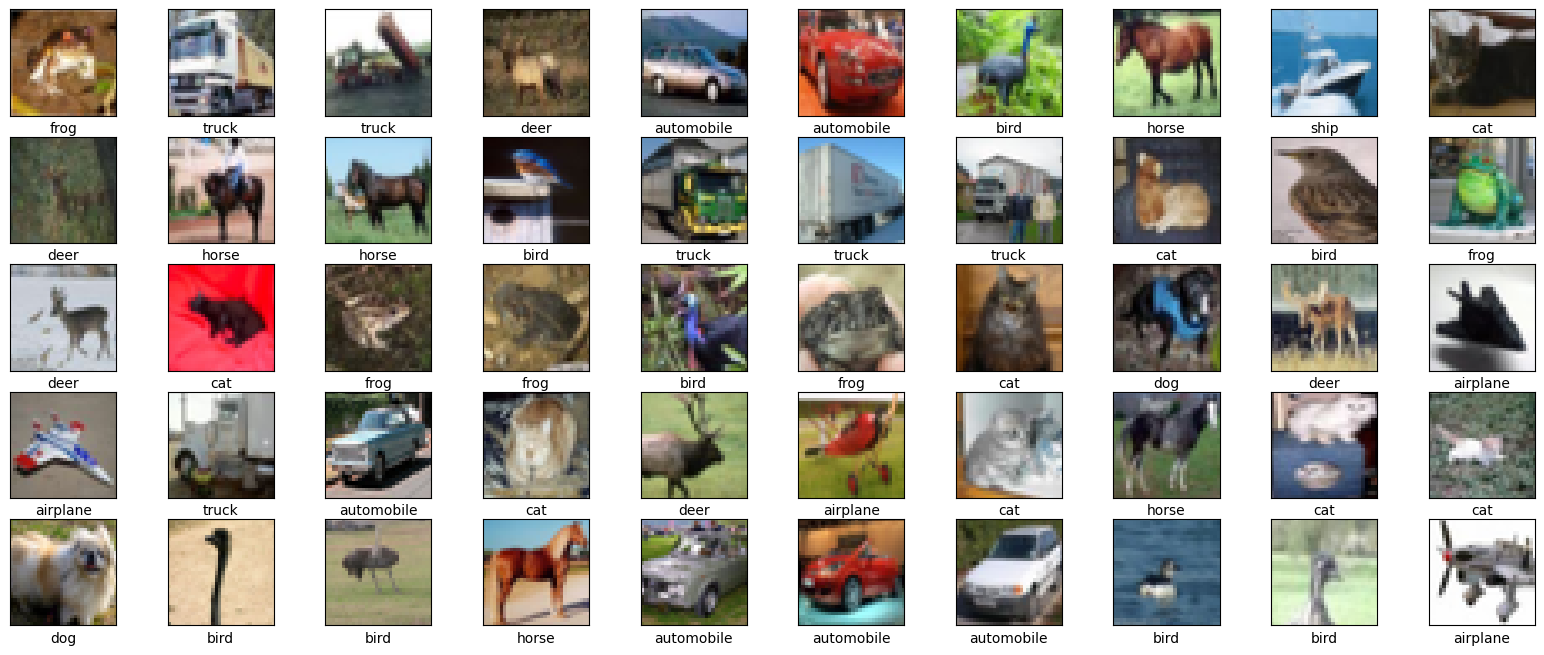

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[Y_train[i][0]])

In [5]:
X_train,X_test = X_train/255.0, X_test/255.0

In [6]:
model = keras.Sequential([
    keras.Input(shape = (32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation="softmax")

])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,954 (292.79 KB)

 Trainable params: 74,954 (292.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [8]:
from tqdm import tqdm

In [9]:
h = model.fit(
    x=X_train,
    y=Y_train,
    validation_split=0.2,
    epochs = 5,
    batch_size=32)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 51ms/step - accuracy: 0.3280 - loss: 1.8032 - val_accuracy: 0.5096 - val_loss: 1.3636
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.5360 - loss: 1.2970 - val_accuracy: 0.5878 - val_loss: 1.1739
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.6044 - loss: 1.1201 - val_accuracy: 0.5996 - val_loss: 1.1427
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 51ms/step - accuracy: 0.6406 - loss: 1.0167 - val_accuracy: 0.6446 - val_loss: 1.0333
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 55ms/step - accuracy: 0.6822 - loss: 0.9077 - val_accuracy: 0.6568 - val_loss: 0.9894


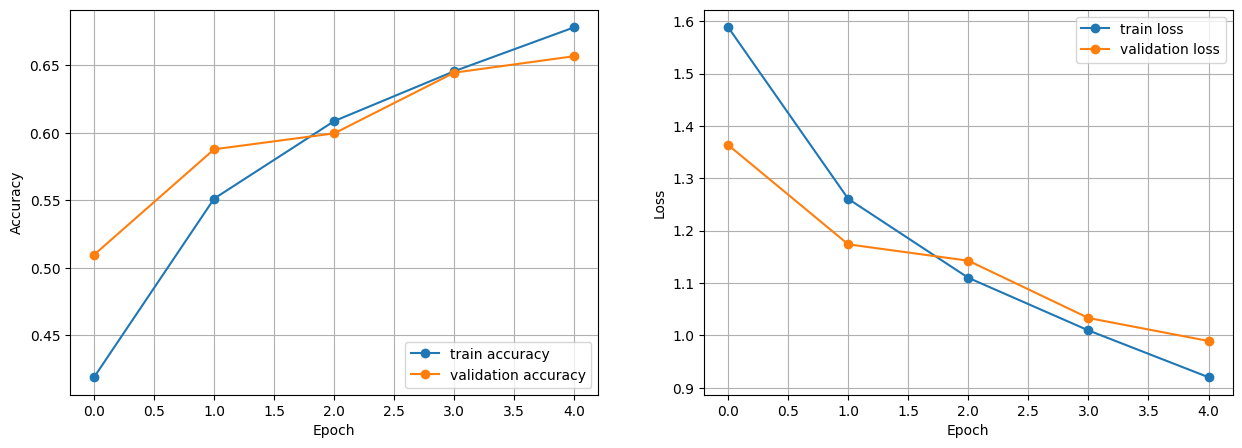

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6503 - loss: 1.0078

Test Accuracy: 0.6513000130653381

Test Loss: 1.0053002834320068


In [12]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


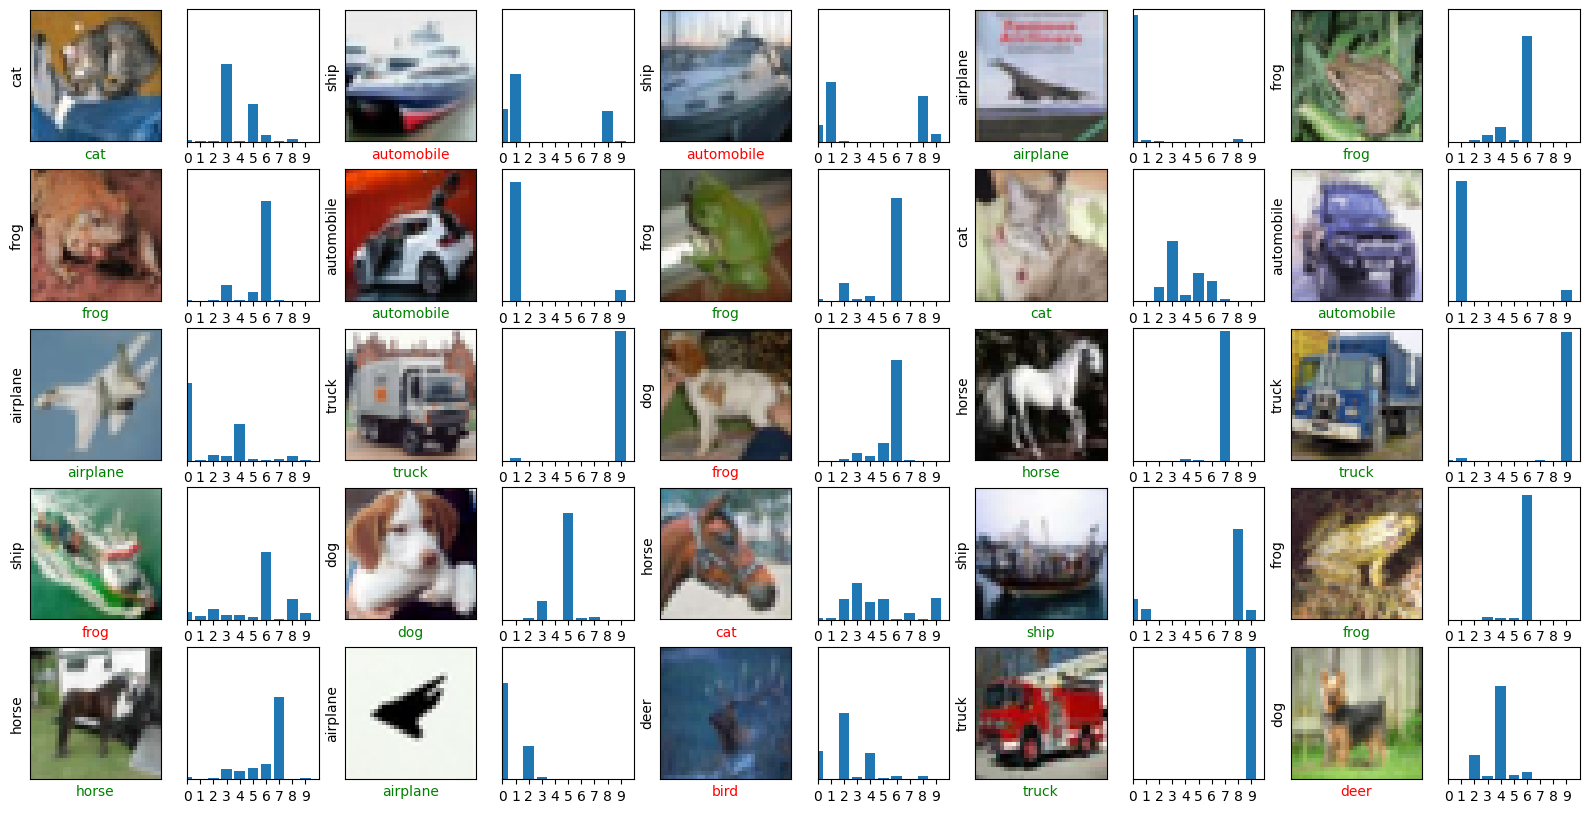

In [13]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()